In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
## Import the custom library
import os
import sys

In [3]:
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import scanpy as sc
import json
import seaborn as sns
import tqdm
import scipy.stats as stats

In [5]:
sc

<module 'scanpy' from 'C:\\Users\\Johannes\\Documents\\GitHub\\scanpy\\scanpy\\__init__.py'>

In [6]:
# function to compute the mid point of a square
def centroid_mean(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    centroid = [int(sum(x) / len(points)), int(sum(y) / len(points))]
    return centroid

# convert coordinates into µm
def coord_to_um(coord, resolution):
    x = coord * resolution * 2
    return x

# convert grid coordinates into pixel coordinates
def coord_to_pixel(coord, resolution, scale, offset):
    x = coord * resolution * 2 * scale + offset
    return x

def dbitseq_to_squidpy(adata, image):
    # add coordinates to adata object
    adata.obs['array_row'] = np.array([int(elem.split(',')[1]) for elem in adata.obs_names])
    adata.obs['array_col'] = np.array([int(elem.split(',')[0]) for elem in adata.obs_names])

    # parameters
    resolution = 50 #µm
    scale = image_metadata["pixel_per_um"]
    offset_row = image_metadata["upper_left_point"][0]
    offset_col = image_metadata["upper_left_point"][1]

    # compute µm coordinates
    adata.obs['um_row'] = np.array([coord_to_um(c, resolution) for c in adata.obs['array_row']])
    adata.obs['um_col'] = np.array([coord_to_um(c, resolution) for c in adata.obs['array_col']])

    # compute pixel coordinates
    adata.obs['pixel_row'] = np.array([coord_to_pixel(c, resolution, scale, offset_row) for c in adata.obs['array_row']])
    adata.obs['pixel_col'] = np.array([coord_to_pixel(c, resolution, scale, offset_col) for c in adata.obs['array_col']])

    # Add transcriptome coordinates to adata
    adata.obsm["spatial"] = adata.obs[["pixel_col", "pixel_row"]].values
    
    # add image to adata
    spatial_key = "spatial"
    library_id = "liver_young"
    adata.uns[spatial_key] = {library_id: {}}
    adata.uns[spatial_key][library_id]["images"] = {}
    adata.uns[spatial_key][library_id]["images"] = {"hires": image}
    adata.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": 1, "spot_diameter_fullres": 0.5}

In [7]:
#data_path = "/Users/johannes.wirth/Nextcloud/DbitX/data"
data_path = "/Users/Johannes/Nextcloud/DbitX/data"

### Load data

In [8]:
adata = sc.read_h5ad(os.path.join(data_path, "37_13_ST_filtered_unnormalized.h5ad"))

## Load image data

In [9]:
## reload rotated images
bf_rotated = cv2.imread(os.path.join(data_path, "images/37_13_bf_rotated.tif"), 0)
bf_rgb = cv2.imread(os.path.join(data_path, "images/37_13_bf_rotated.tif"), 1)
dapi_rotated = cv2.imread(os.path.join(data_path, "images/37_13_dapi_rotated.tif"), 0)

# reload metadata
with open(os.path.join(data_path, "images/37_13_metadata.json")) as infile:
    image_metadata = json.load(infile)

In [10]:
dbitseq_to_squidpy(adata, image=bf_rgb)

In [11]:
adata

AnnData object with n_obs × n_vars = 870 × 10220
    obs: 'array_row', 'array_col', 'um_row', 'um_col', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '18S_pct', 'n_counts', 'pixel_row', 'pixel_col'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'images', 'spatial'
    obsm: 'spatial'

here I am
here I am again
hello


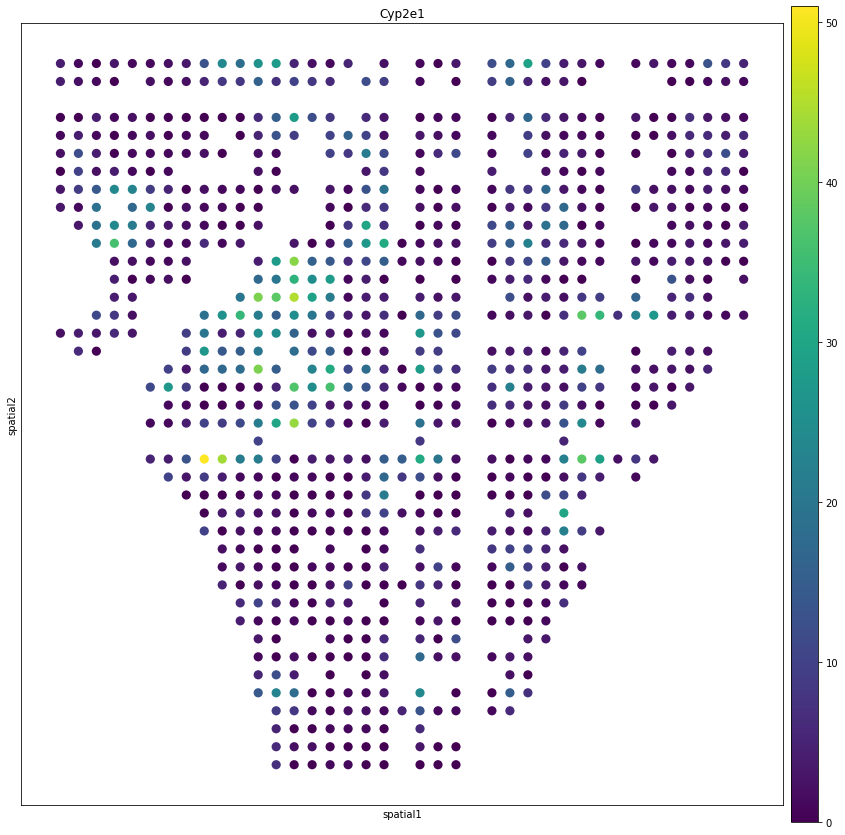

In [60]:
_, ax = plt.subplots(1,1, figsize=(15,15))
sc.pl.spatial(adata, color="Cyp2e1", spot_size=80, alpha=1, ax=ax, img_key=None)

In [13]:
sc.pl.spatial

<function scanpy.plotting._tools.scatterplots.spatial(adata: anndata._core.anndata.AnnData, *, color: Union[str, Sequence[str], NoneType] = None, gene_symbols: Union[str, NoneType] = None, use_raw: Union[bool, NoneType] = None, sort_order: bool = True, edges: bool = False, edges_width: float = 0.1, edges_color: Union[str, Sequence[float], Sequence[str]] = 'grey', neighbors_key: Union[str, NoneType] = None, arrows: bool = False, arrows_kwds: Union[Mapping[str, Any], NoneType] = None, groups: Union[str, NoneType] = None, components: Union[str, Sequence[str]] = None, layer: Union[str, NoneType] = None, projection: Literal['2d', '3d'] = '2d', scale_factor: Union[float, NoneType] = None, color_map: Union[matplotlib.colors.Colormap, str, NoneType] = None, cmap: Union[matplotlib.colors.Colormap, str, NoneType] = None, palette: Union[str, Sequence[str], cycler.Cycler, NoneType] = None, na_color: Union[str, Tuple[float, ...], NoneType] = None, na_in_legend: bool = True, size: float = 1.0, frame